In [1]:
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pathlib
from pathlib import Path

In [2]:
path = Path(pathlib.Path.home(), "Image023_ch00.tif")
print(path)

C:\Users\Валера\Image023_ch00.tif


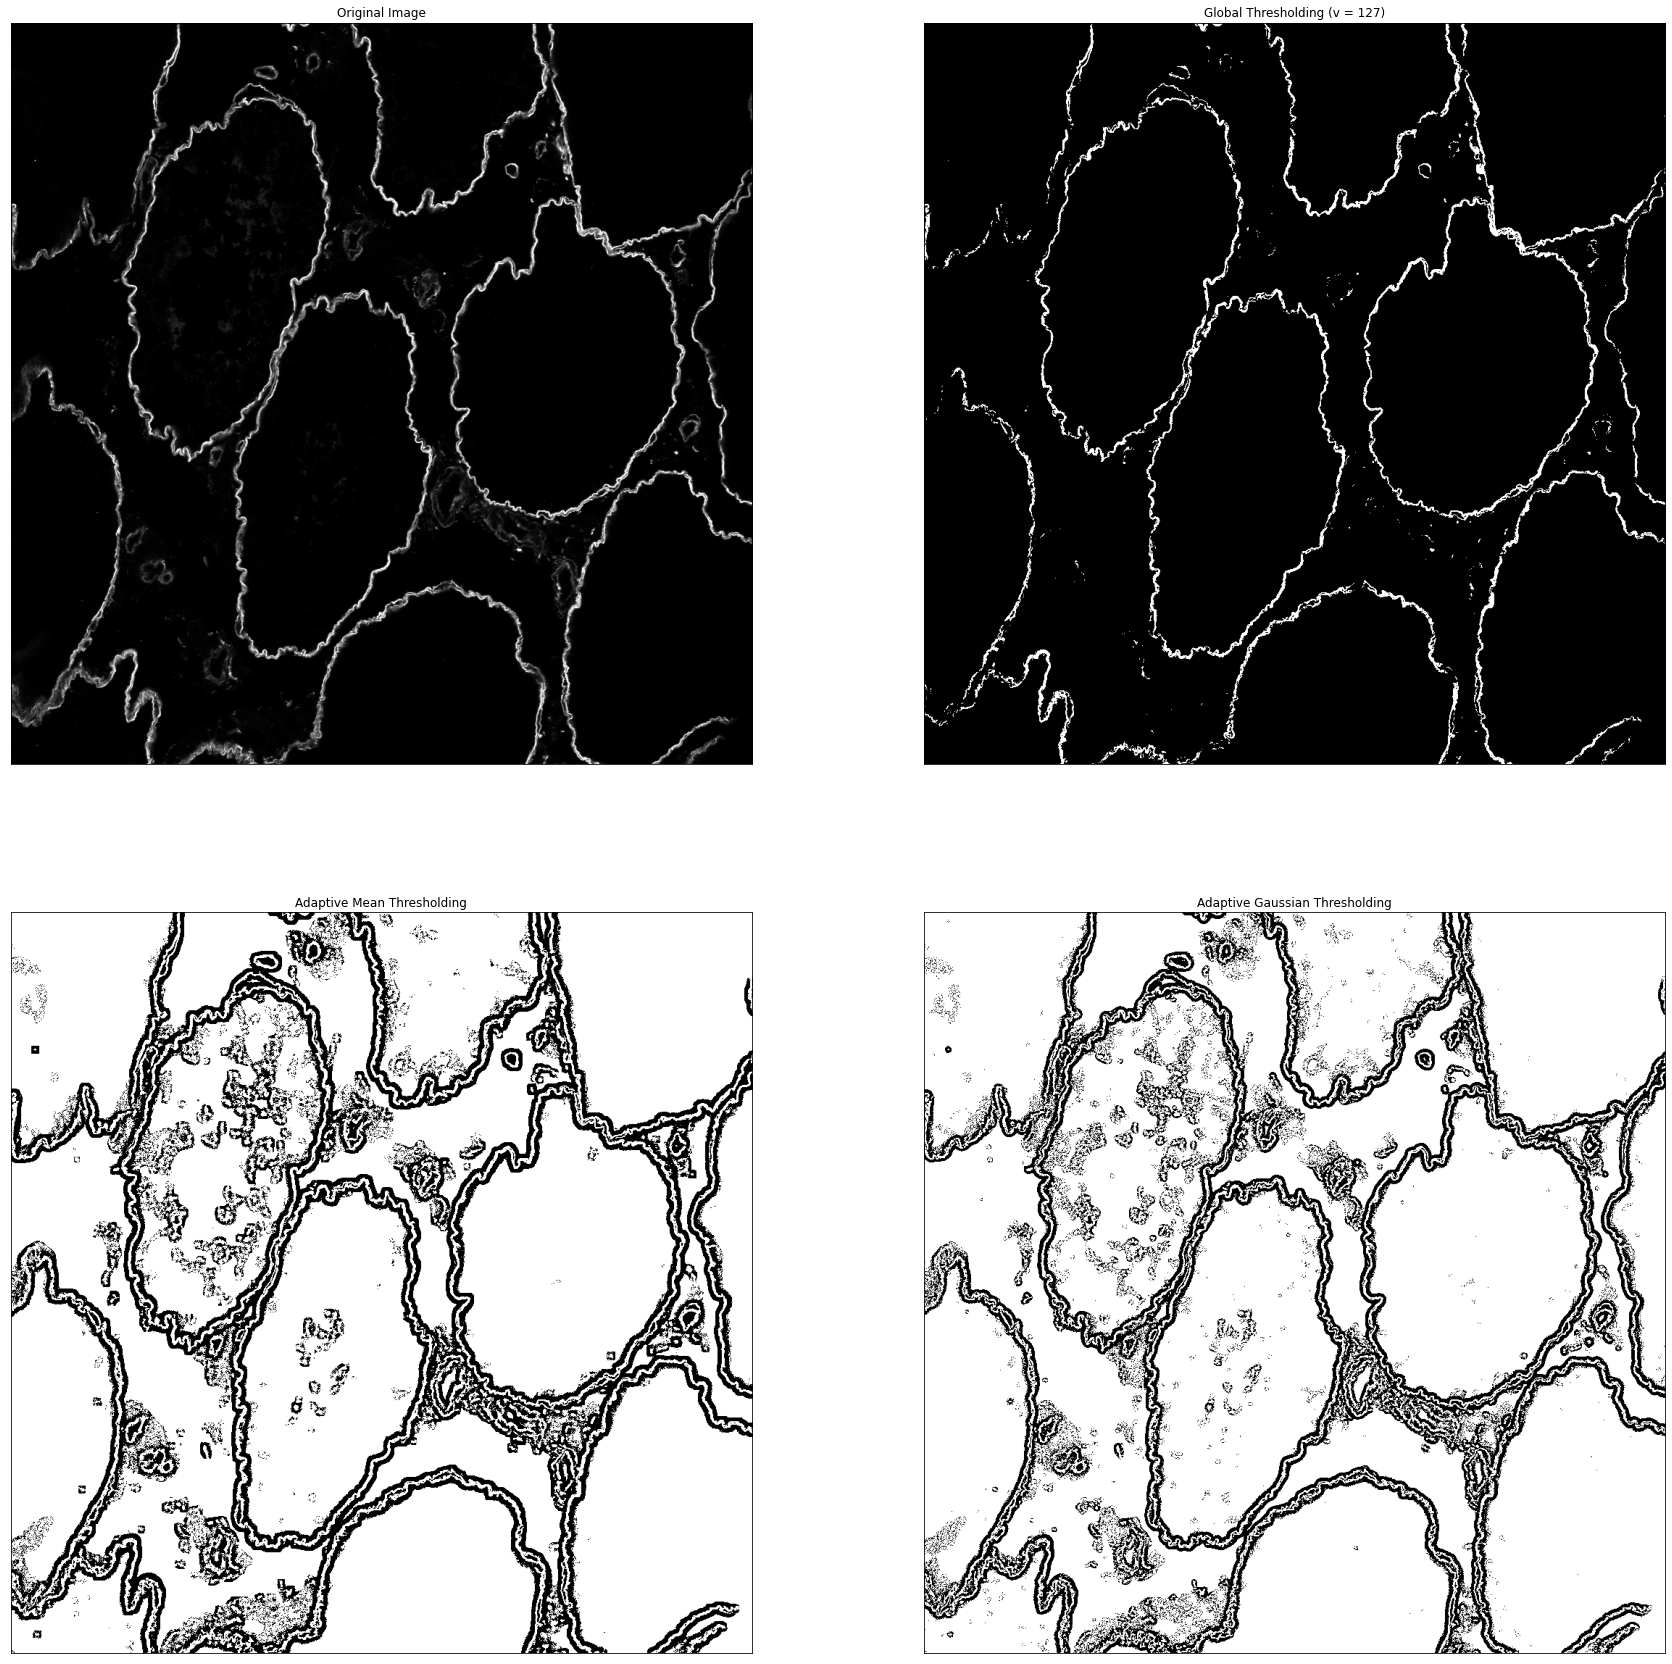

In [3]:
img = cv.imread('Image023_ch00.tif',0)
img = cv.medianBlur(img,1)
ret,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(30, 30))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [15]:
img = cv.imread('Image023_ch00.tif',0)
ret,th1 = cv.threshold(th1,100,255,cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(th1.copy(), cv.RETR_TREE , cv.CHAIN_APPROX_SIMPLE)
cv.drawContours( th1, contours, -1, (255,0,0), 1, cv.LINE_AA, hierarchy, 1 )
cv.imshow('contours', th1)
cv.waitKey()
cv.destroyAllWindows()

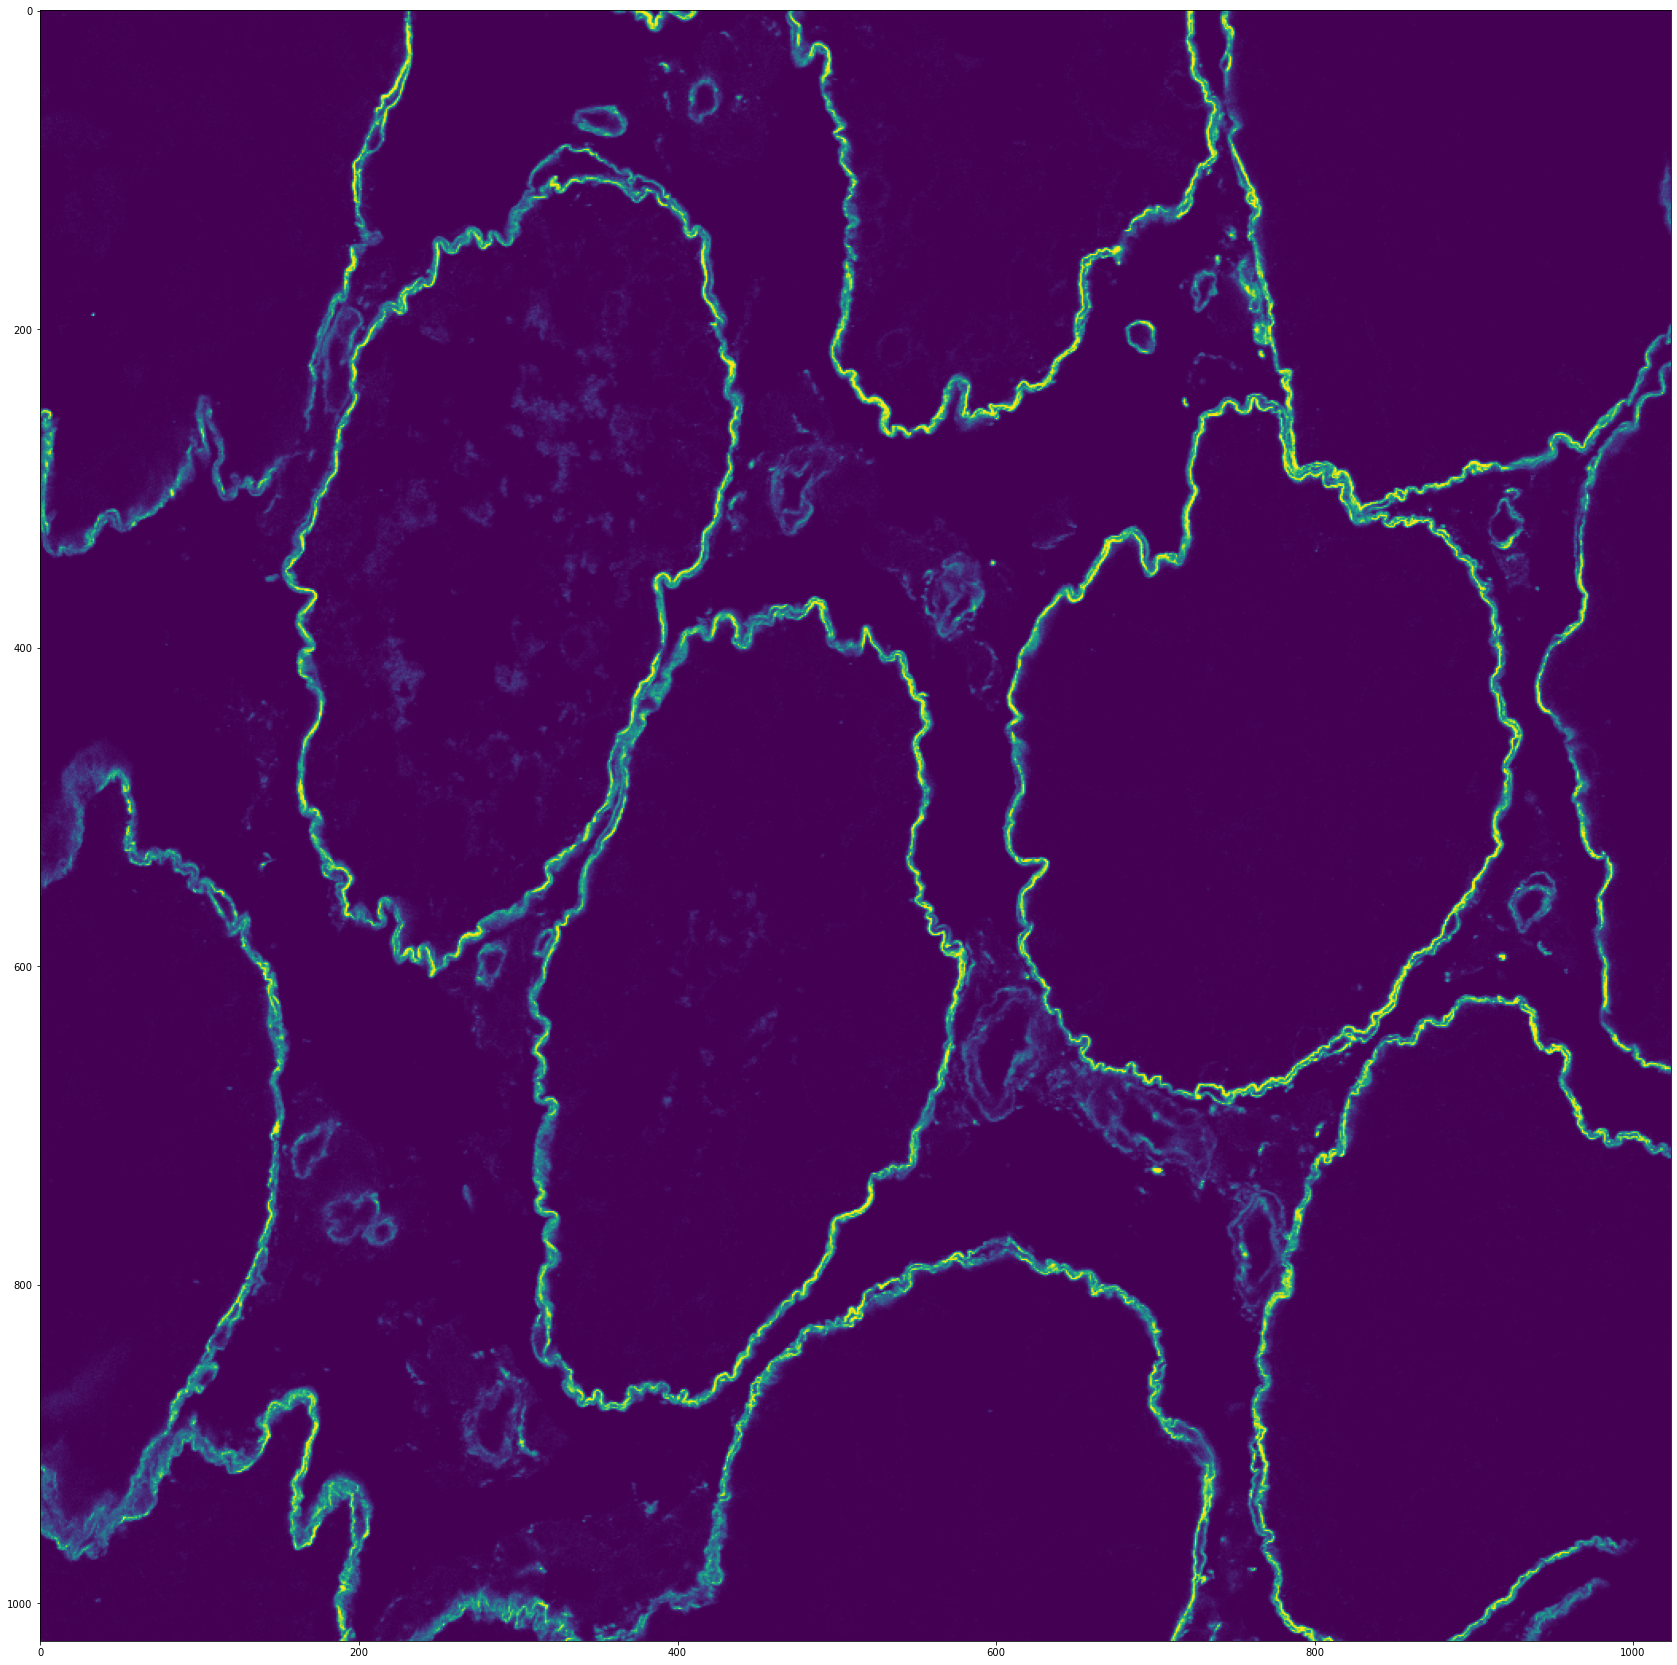

In [20]:
src = cv.imread('Image023_ch00.tif')
gr = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(30, 30))
plt.imshow(gr)

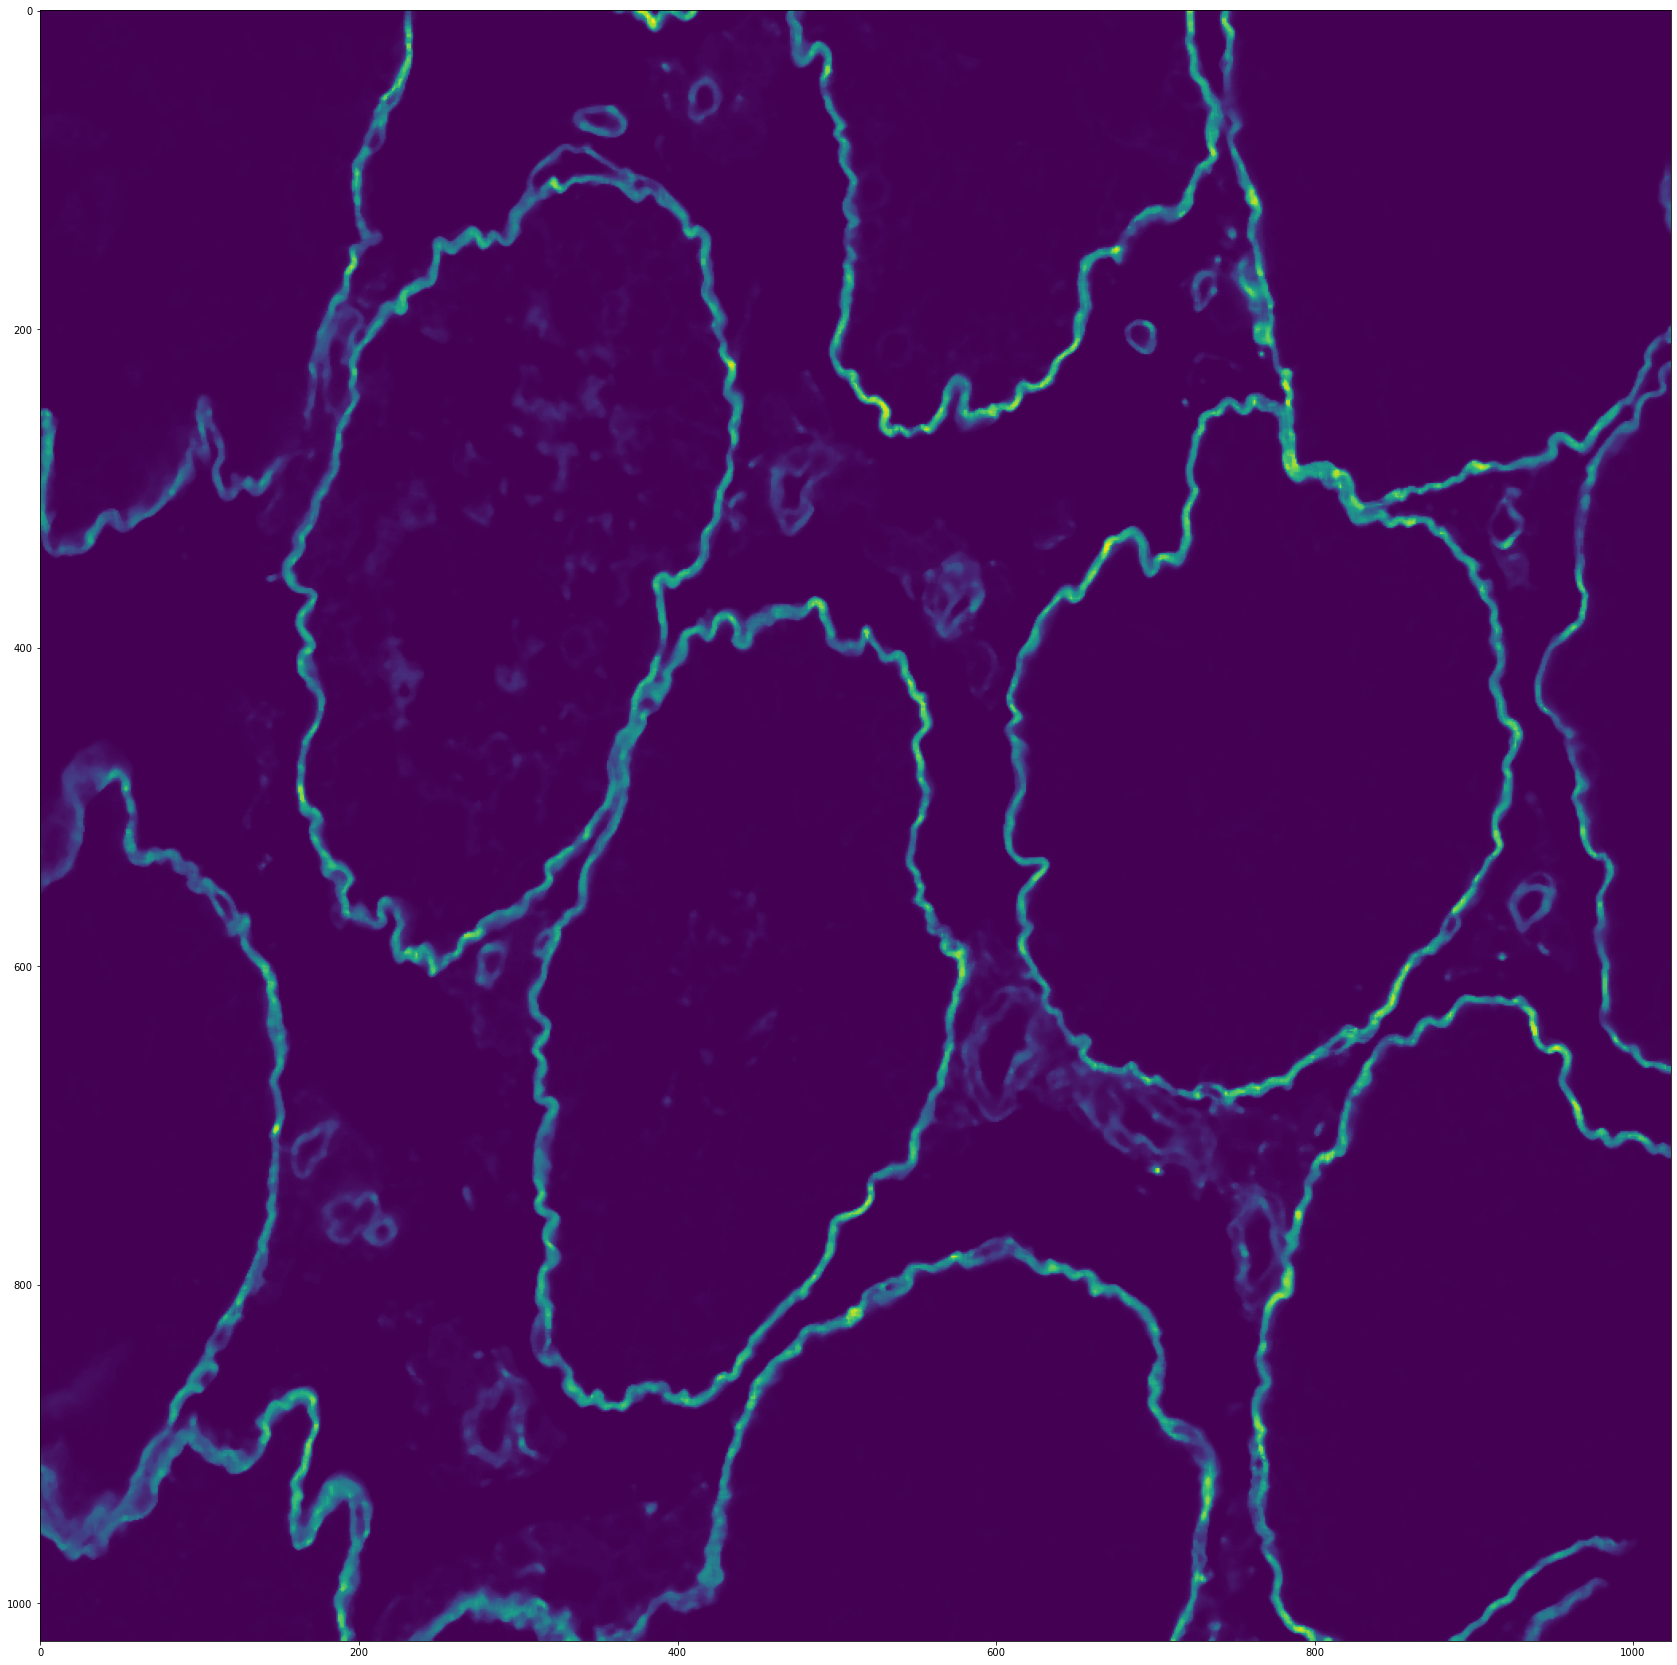

In [21]:
bl = cv.medianBlur(gr, 5)
plt.figure(figsize=(30, 30))
plt.imshow(bl)

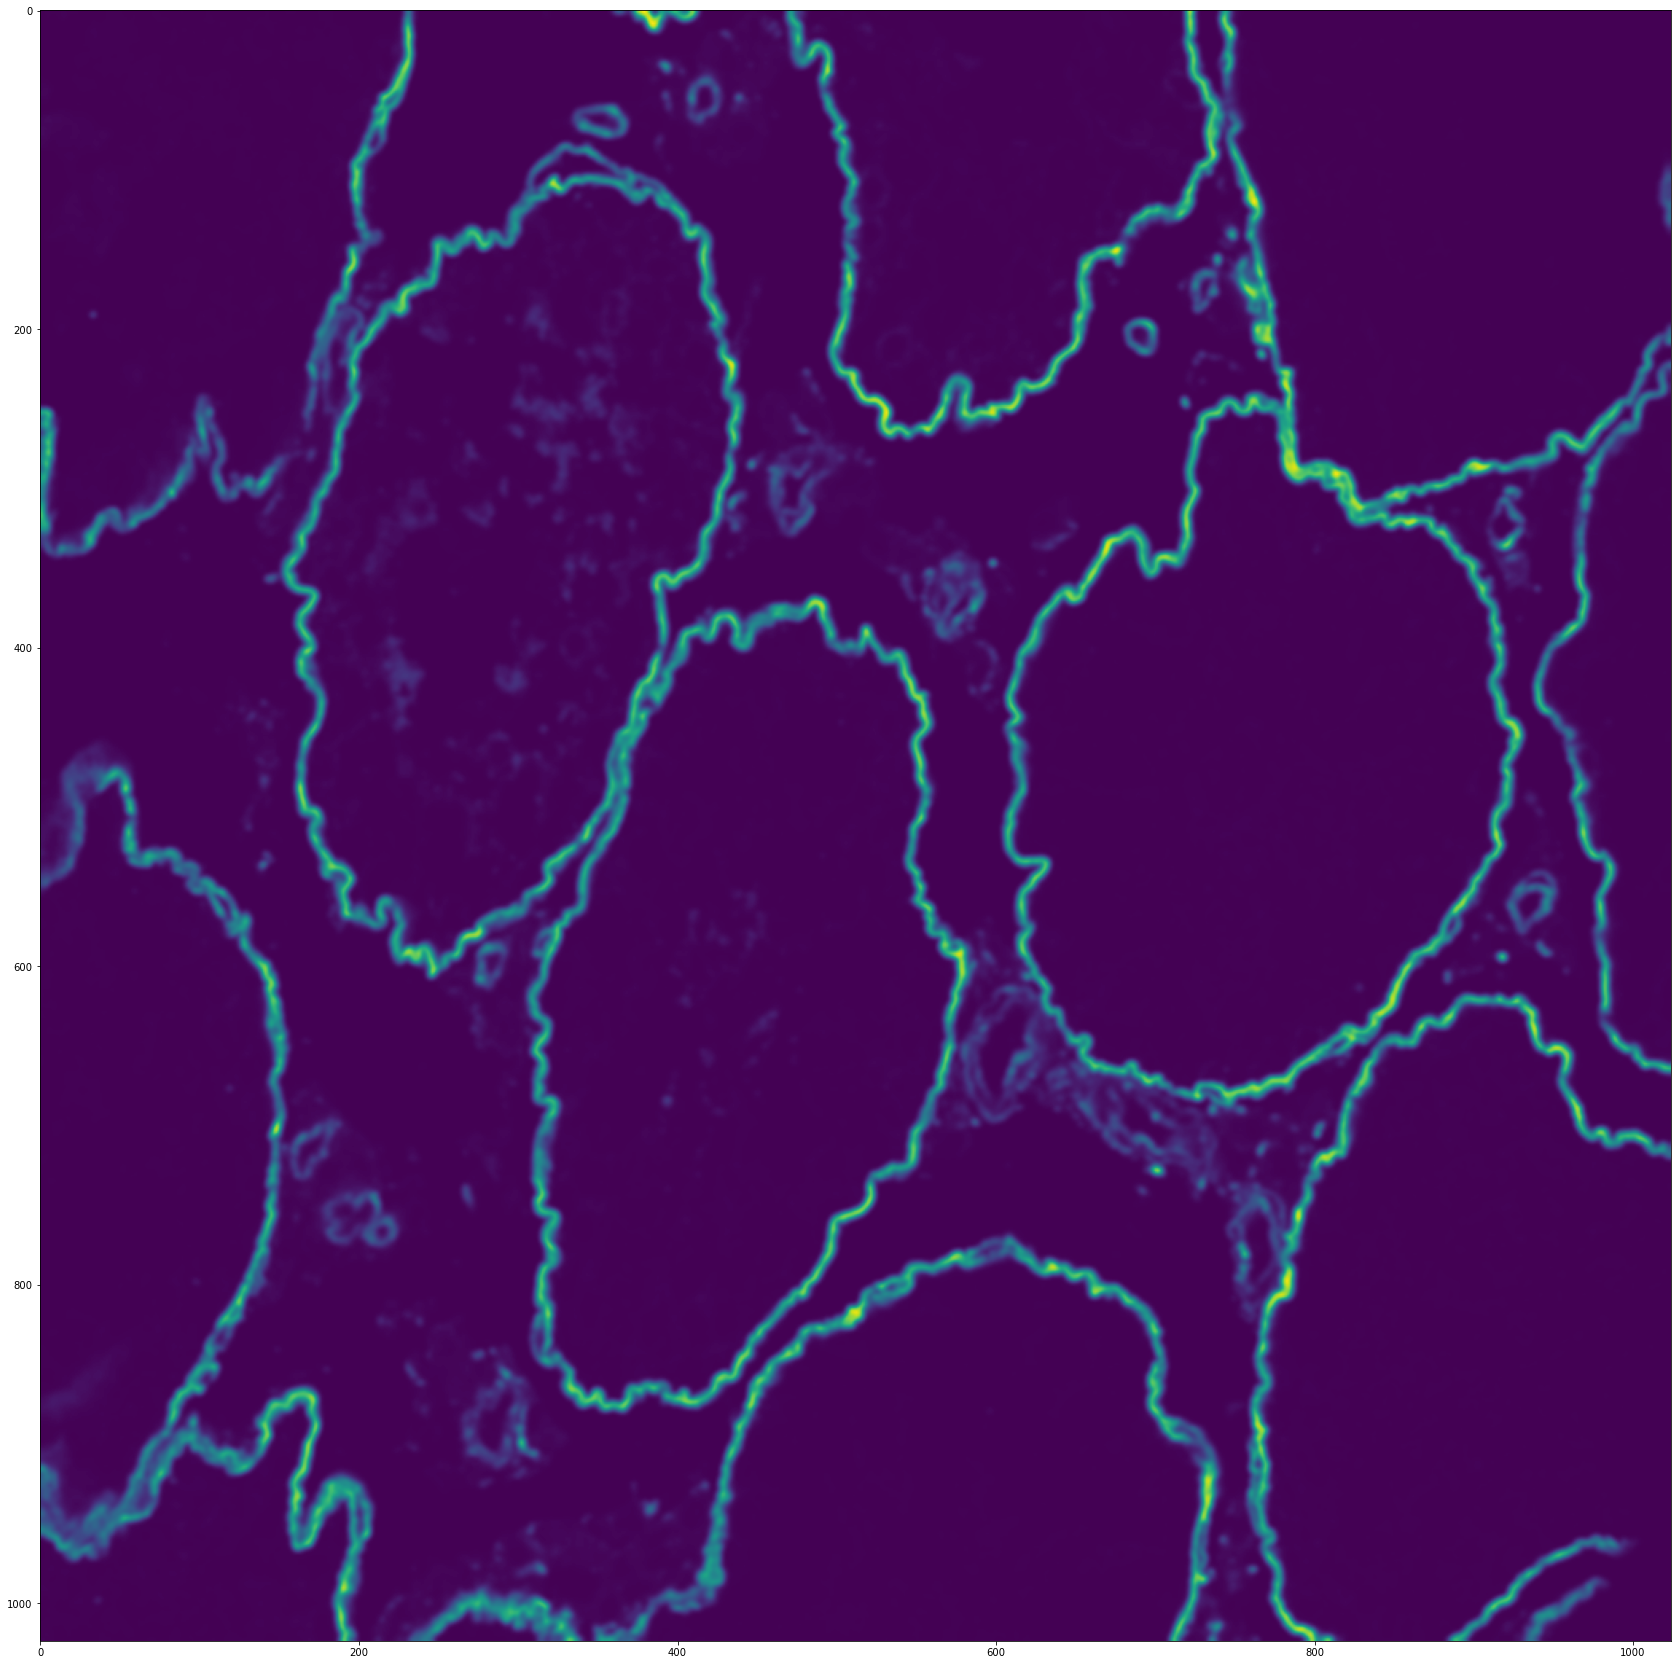

In [32]:
gbl = cv.GaussianBlur(gr, (9,9),0)
plt.figure(figsize=(30, 30))
plt.imshow(gbl)

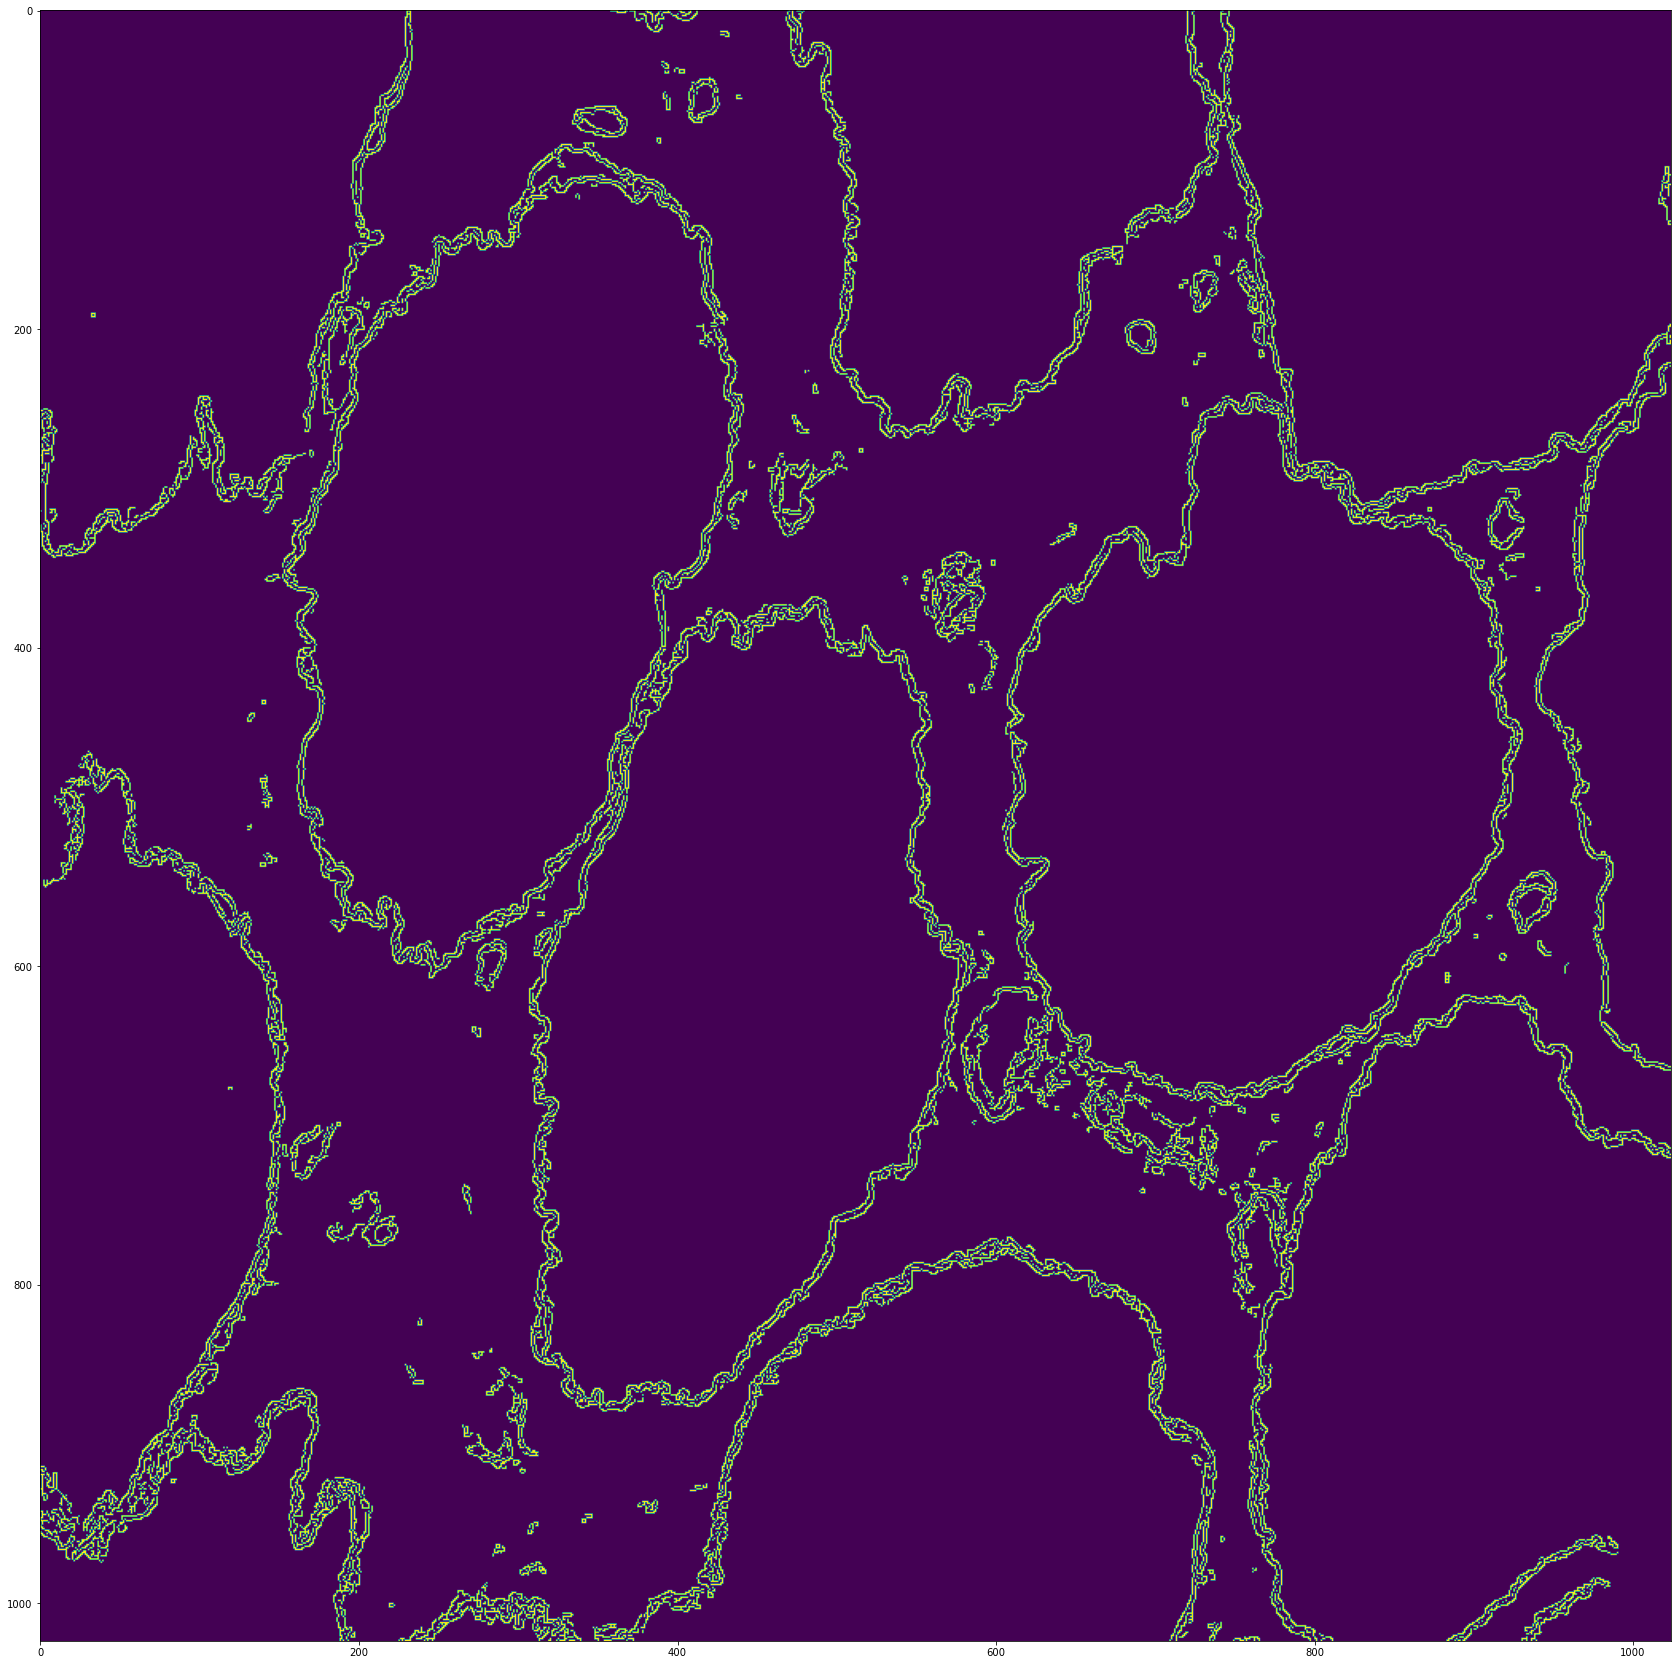

In [41]:
canny = cv.Canny(gr, 10, 250)
plt.figure(figsize=(30, 30))
plt.imshow(canny)

True

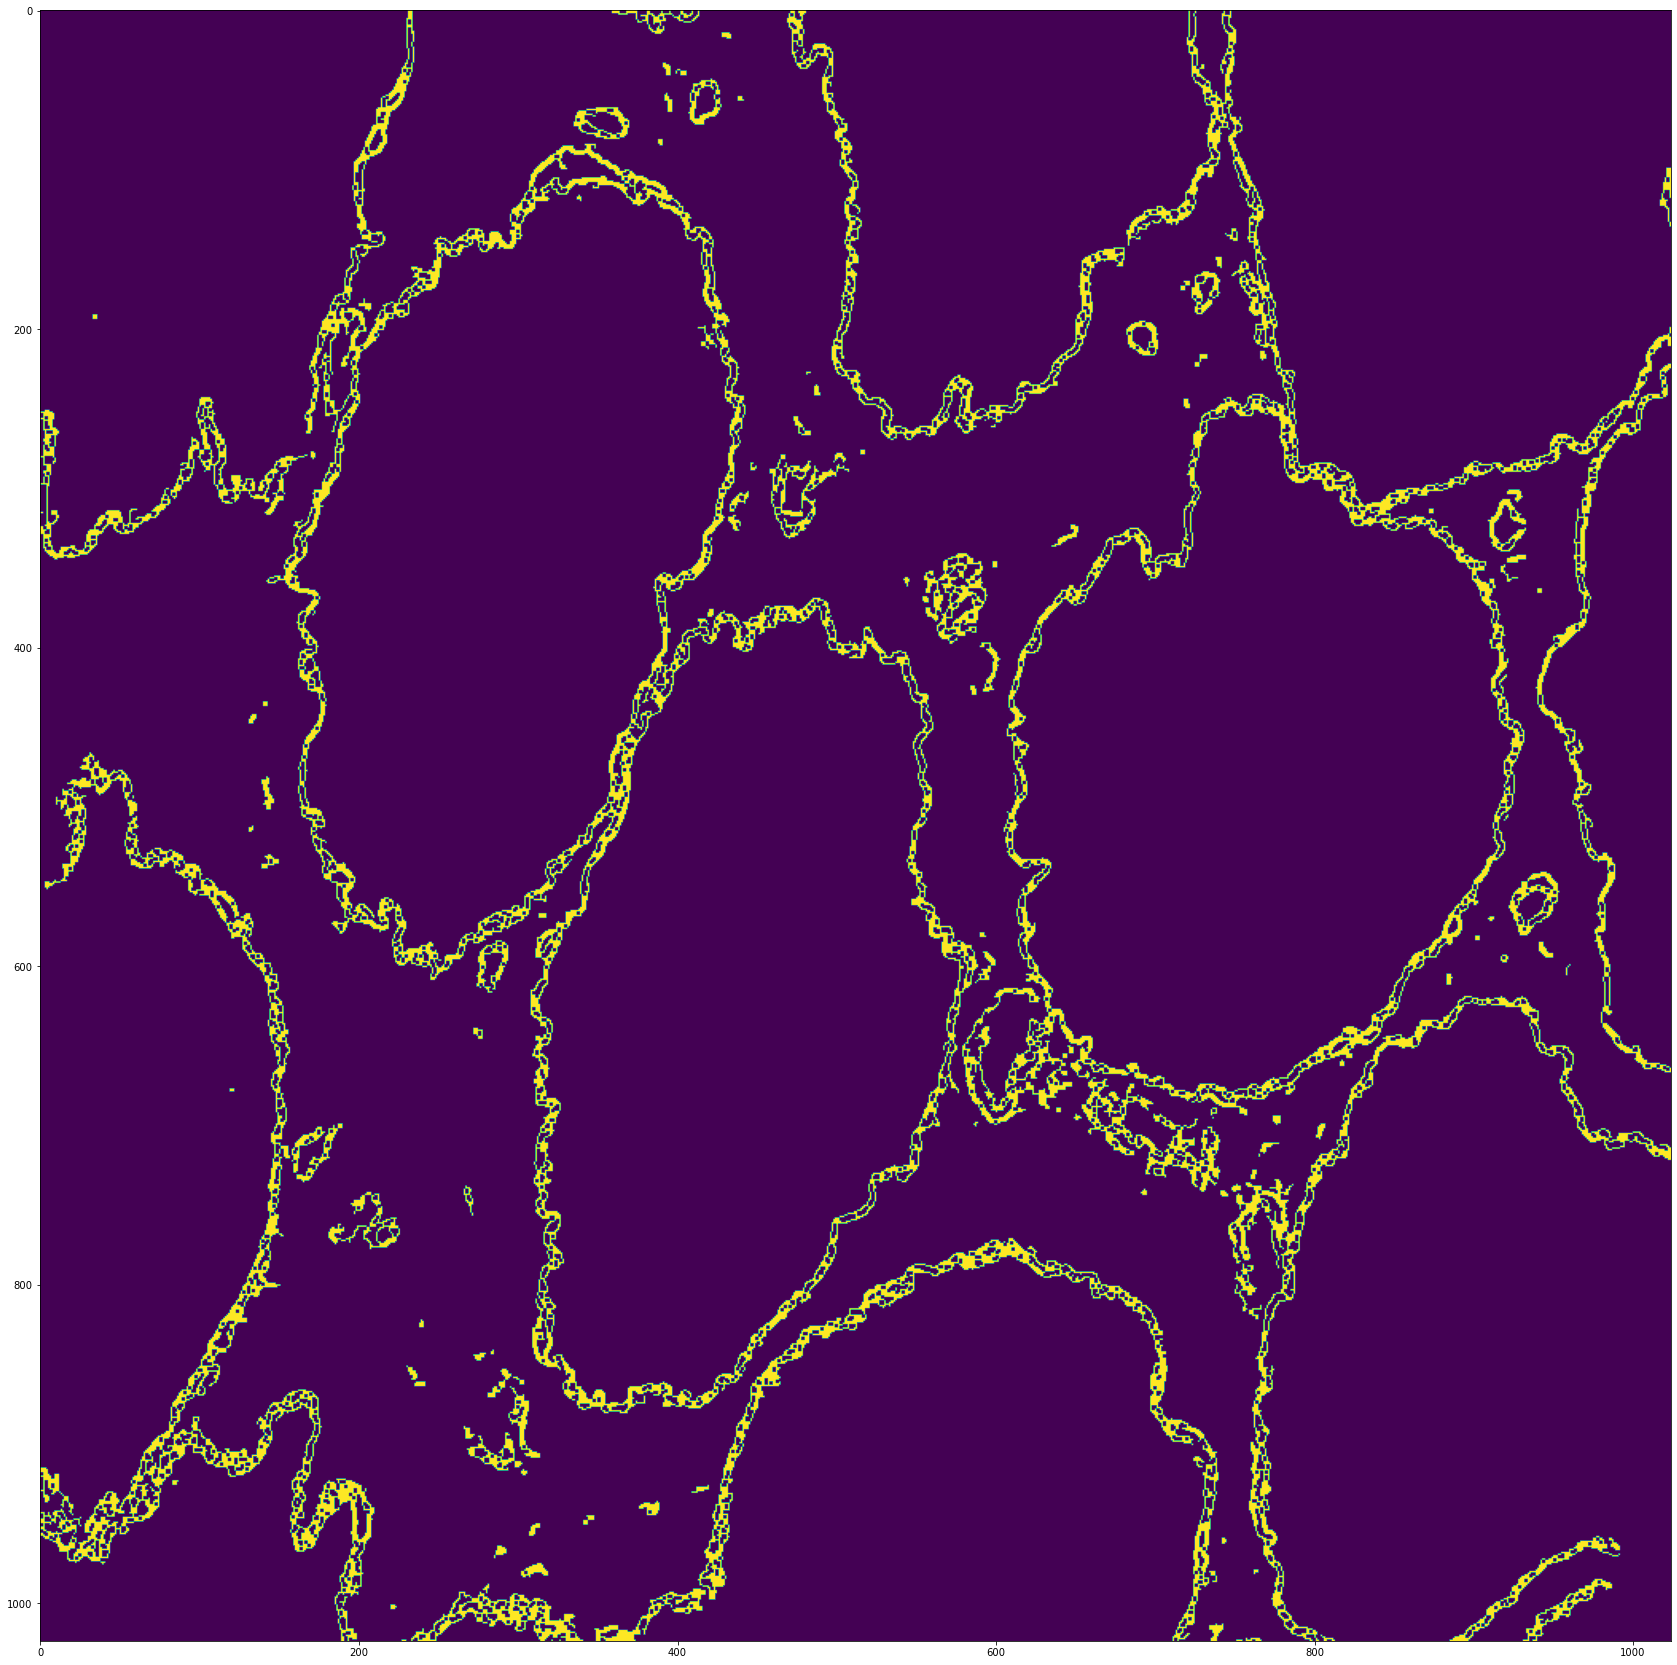

In [61]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
closed = cv.morphologyEx(canny, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(30, 30))
plt.imshow(closed)
cv.imwrite('result.jpg', closed)

In [64]:
contours = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

        
cv.drawContours(src, contours, -1, (255,0,0), 4)
cv.imwrite('result.jpg', src)

True

In [63]:

contours, hierarchy = cv.findContours(closed.copy(), cv.RETR_TREE , cv.CHAIN_APPROX_SIMPLE)
cv.drawContours( closed, contours, -1, (255,0,0), 1, cv.LINE_AA, hierarchy, 1 )
cv.imshow('contours', th1)
cv.waitKey()
cv.destroyAllWindows()